In [13]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load webscraped data

In [2]:
raw_df = pd.read_csv("data/sneakers_2025-06-21_1639.csv")
raw_df.shape

(535, 7)

In [3]:
raw_df.head()

,prodTypeID,brand,title,price,rating,sponsored,link
0,B08PKD3ZYL,Nike,Women's Offcourt Trainers,S$89.00,4.5 out of 5 stars,Yes,https://www.amazon.sg/sspa/click?ie=UTF8&spc=M...
1,B0C5WSQHPX,VANZACK,Sneakers for Girls Espadrille Sneakers Women C...,S$7.87,NaN,Yes,https://www.amazon.sg/sspa/click?ie=UTF8&spc=M...
2,B09VT15Z95,adidas,Grand Court TD Lifestyle Sneakers,S$54.75,4.3 out of 5 stars,No,https://www.amazon.sg/Adidas-Grand-Sneakers-Fo...
3,B09VSZKVJ1,adidas,Advancourt Base Lifestyle LIT48 Men's Sneakers,S$43.33,4.1 out of 5 stars,No,https://www.amazon.sg/Adidas-EE7690-Sneakers-f...
4,B0B691P2Y4,adidas(アディダス),Advan Court Base Lifestyle Men's Sneakers,S$43.20,4.2 out of 5 stars,No,https://www.amazon.sg/Adidas-EE7690-Sneakers-F...


# 2) ETL

In [4]:
cleaned_df = raw_df[['prodTypeID', 'brand', 'title', 'price', 'rating', 'sponsored']]
cleaned_df.head()

,prodTypeID,brand,title,price,rating,sponsored
0,B08PKD3ZYL,Nike,Women's Offcourt Trainers,S$89.00,4.5 out of 5 stars,Yes
1,B0C5WSQHPX,VANZACK,Sneakers for Girls Espadrille Sneakers Women C...,S$7.87,NaN,Yes
2,B09VT15Z95,adidas,Grand Court TD Lifestyle Sneakers,S$54.75,4.3 out of 5 stars,No
3,B09VSZKVJ1,adidas,Advancourt Base Lifestyle LIT48 Men's Sneakers,S$43.33,4.1 out of 5 stars,No
4,B0B691P2Y4,adidas(アディダス),Advan Court Base Lifestyle Men's Sneakers,S$43.20,4.2 out of 5 stars,No


## a) Clean up column 'brand'

In [5]:
cleaned_df['brand'] = cleaned_df['brand'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x))
cleaned_df.head()

/var/folders/d3/ft0xxf_x2fn8cd_dsd64d26h0000gn/T/ipykernel_42288/3939581056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['brand'] = cleaned_df['brand'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x))


,prodTypeID,brand,title,price,rating,sponsored
0,B08PKD3ZYL,Nike,Women's Offcourt Trainers,S$89.00,4.5 out of 5 stars,Yes
1,B0C5WSQHPX,VANZACK,Sneakers for Girls Espadrille Sneakers Women C...,S$7.87,NaN,Yes
2,B09VT15Z95,adidas,Grand Court TD Lifestyle Sneakers,S$54.75,4.3 out of 5 stars,No
3,B09VSZKVJ1,adidas,Advancourt Base Lifestyle LIT48 Men's Sneakers,S$43.33,4.1 out of 5 stars,No
4,B0B691P2Y4,adidas,Advan Court Base Lifestyle Men's Sneakers,S$43.20,4.2 out of 5 stars,No


## b) Clean up column 'price'

In [6]:
cleaned_df['price'] = cleaned_df['price'].astype(str).str.extract(r'([\d,.]+)')[0]
cleaned_df['price'] = cleaned_df['price'].str.replace(',', '', regex=False).astype(float)

cleaned_df.head()

/var/folders/d3/ft0xxf_x2fn8cd_dsd64d26h0000gn/T/ipykernel_42288/356967592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price'] = cleaned_df['price'].astype(str).str.extract(r'([\d,.]+)')[0]
/var/folders/d3/ft0xxf_x2fn8cd_dsd64d26h0000gn/T/ipykernel_42288/356967592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price'] = cleaned_df['price'].str.replace(',', '', regex=False).astype(float)


,prodTypeID,brand,title,price,rating,sponsored
0,B08PKD3ZYL,Nike,Women's Offcourt Trainers,89.00,4.5 out of 5 stars,Yes
1,B0C5WSQHPX,VANZACK,Sneakers for Girls Espadrille Sneakers Women C...,7.87,NaN,Yes
2,B09VT15Z95,adidas,Grand Court TD Lifestyle Sneakers,54.75,4.3 out of 5 stars,No
3,B09VSZKVJ1,adidas,Advancourt Base Lifestyle LIT48 Men's Sneakers,43.33,4.1 out of 5 stars,No
4,B0B691P2Y4,adidas,Advan Court Base Lifestyle Men's Sneakers,43.20,4.2 out of 5 stars,No


## c) Clean up column 'rating'

In [7]:
cleaned_df['rating'] = cleaned_df['rating'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

cleaned_df.head()

/var/folders/d3/ft0xxf_x2fn8cd_dsd64d26h0000gn/T/ipykernel_42288/58731074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['rating'] = cleaned_df['rating'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)


,prodTypeID,brand,title,price,rating,sponsored
0,B08PKD3ZYL,Nike,Women's Offcourt Trainers,89.00,4.5,Yes
1,B0C5WSQHPX,VANZACK,Sneakers for Girls Espadrille Sneakers Women C...,7.87,NaN,Yes
2,B09VT15Z95,adidas,Grand Court TD Lifestyle Sneakers,54.75,4.3,No
3,B09VSZKVJ1,adidas,Advancourt Base Lifestyle LIT48 Men's Sneakers,43.33,4.1,No
4,B0B691P2Y4,adidas,Advan Court Base Lifestyle Men's Sneakers,43.20,4.2,No


# 3. EDA

In [8]:
# Total number of unique brands
len(set(cleaned_df['brand']))

120

In [9]:
# Top 10 Brands Listed
cleaned_df['brand'].value_counts().head(10)

brand
adidas      55
Skechers    52
PUMA        43
Reebok      35
ColeHaan    25
ecco        19
SAFIGLE     19
MoonStar    17
VANZACK     12
Nike        11
Name: count, dtype: int64

In [10]:
# Bottom 10 Brands Listed
cleaned_df['brand'].value_counts().tail(10)

brand
Brooks            1
SKECHERS          1
LARNMERN          1
GILIO             1
ArmaniExchange    1
DrSchollsShoes    1
AAA               1
DC                1
ABOOFAN           1
Taquco            1
Name: count, dtype: int64

## a) Price and Ratings Analysis

In [11]:
# Group and aggregate
summary = cleaned_df.groupby('brand').agg(
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    price_q25=('price', lambda x: x.quantile(0.25)),
    price_q75=('price', lambda x: x.quantile(0.75)),
    rating_mean=('rating', 'mean'),
    rating_median=('rating', 'median'),
    rating_q25=('rating', lambda x: x.quantile(0.25)),
    rating_q75=('rating', lambda x: x.quantile(0.75)),
    count=('price', 'size')  # or use 'rating' or 'prodTypeID'
)

# Round for readability
summary = summary.round(2)

# Sort by count
summary = summary.sort_values(by='count', ascending=False)

summary

,price_mean,price_median,price_q25,price_q75,rating_mean,rating_median,rating_q25,rating_q75,count
brand,,,,,,,,,
adidas,67.79,51.35,43.26,69.11,4.36,4.40,4.20,4.6,55
Skechers,100.71,91.95,86.11,112.25,4.30,4.50,4.40,4.5,52
PUMA,79.21,70.97,51.86,105.24,4.33,4.40,4.12,4.5,43
Reebok,100.91,98.17,78.79,125.70,4.41,4.45,4.30,4.5,35
ColeHaan,143.43,131.04,119.60,174.25,4.54,4.50,4.50,4.6,25
...,...,...,...,...,...,...,...,...,...
KEENUtility,110.50,110.50,110.50,110.50,4.20,4.20,4.20,4.2,1
Joomra,60.38,60.38,60.38,60.38,4.30,4.30,4.30,4.3,1
JAGUAR,40.02,40.02,40.02,40.02,4.00,4.00,4.00,4.0,1


/var/folders/d3/ft0xxf_x2fn8cd_dsd64d26h0000gn/T/ipykernel_42288/2814897174.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brands, y=df['count'], ax=axes[2], palette="viridis")


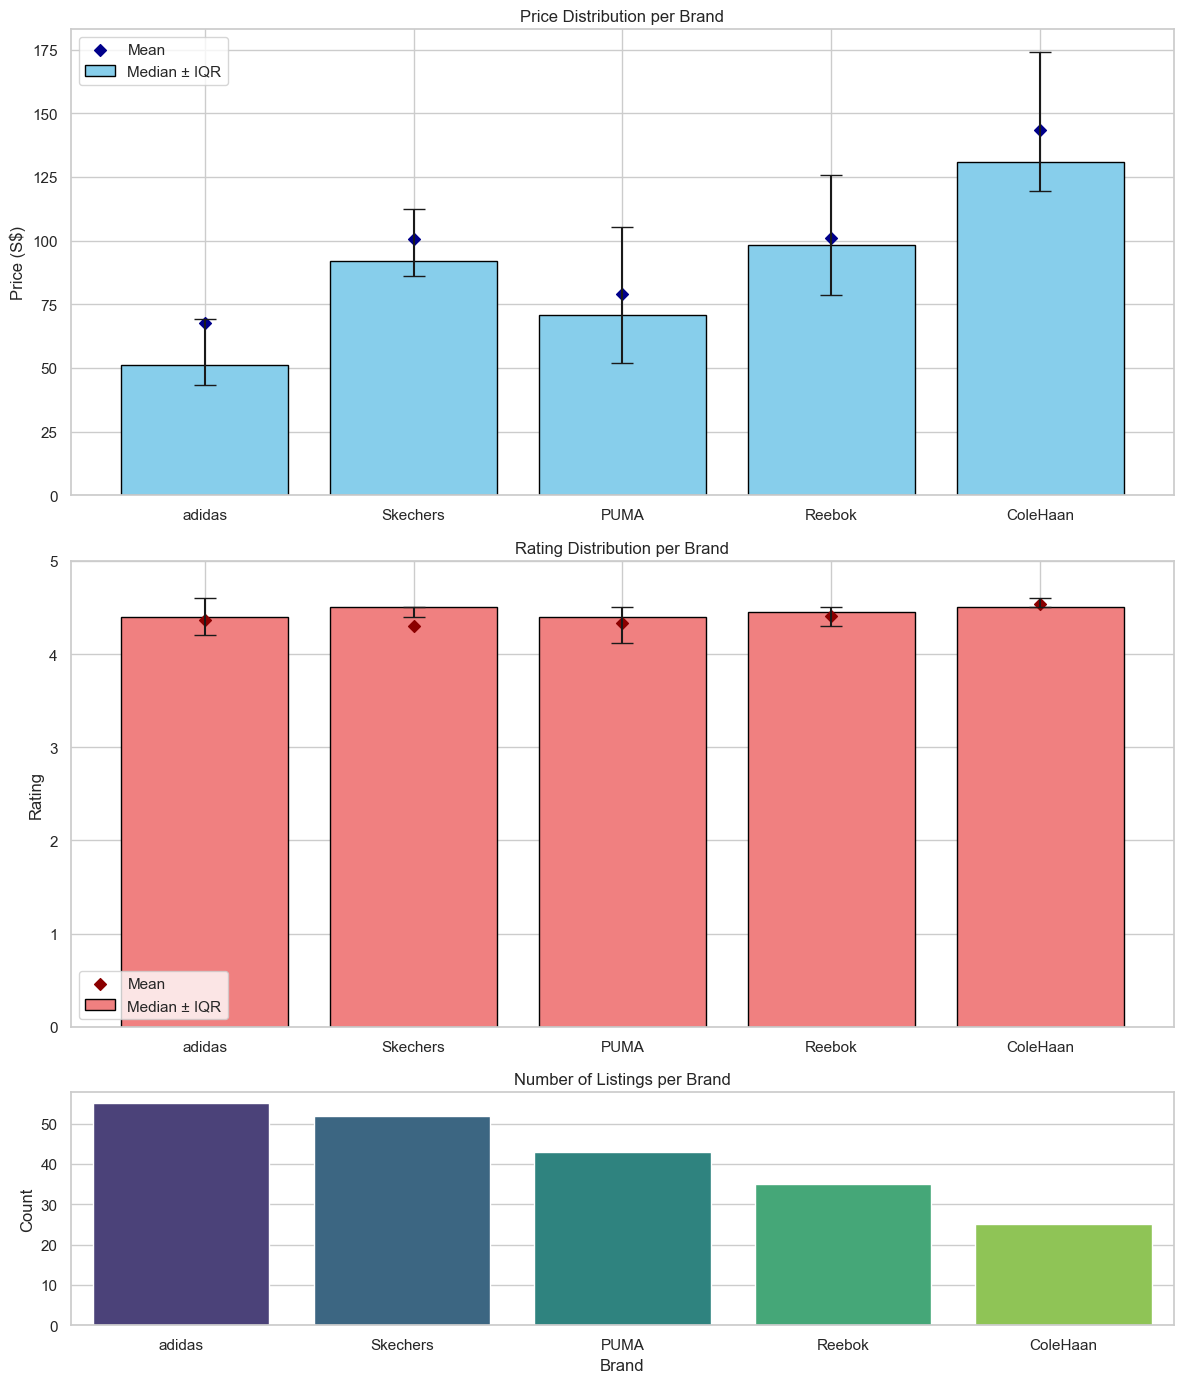

In [16]:
df = summary.head()  # Adjust to your top N brands

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [2, 2, 1]})
brands = df.index.tolist()

### 1. Price Distribution with Median (bar), IQR (error bar), and Mean (dot)
axes[0].bar(
    brands, df['price_median'],
    yerr=[df['price_median'] - df['price_q25'], df['price_q75'] - df['price_median']],
    capsize=8, color="skyblue", edgecolor="black", label="Median ± IQR"
)
# Add Mean as a dot
axes[0].scatter(brands, df['price_mean'], color='darkblue', marker='D', label="Mean")
axes[0].set_title("Price Distribution per Brand")
axes[0].set_ylabel("Price (S$)")
axes[0].legend()

### 2. Rating Distribution with Median (bar), IQR (error bar), and Mean (dot)
axes[1].bar(
    brands, df['rating_median'],
    yerr=[df['rating_median'] - df['rating_q25'], df['rating_q75'] - df['rating_median']],
    capsize=8, color="lightcoral", edgecolor="black", label="Median ± IQR"
)
# Add Mean as a dot
axes[1].scatter(brands, df['rating_mean'], color='darkred', marker='D', label="Mean")
axes[1].set_title("Rating Distribution per Brand")
axes[1].set_ylabel("Rating")
axes[1].set_ylim(0, 5)
axes[1].legend()

### 3. Count of Listings per Brand
sns.barplot(x=brands, y=df['count'], ax=axes[2], palette="viridis")
axes[2].set_title("Number of Listings per Brand")
axes[2].set_ylabel("Count")
axes[2].set_xlabel("Brand")

plt.tight_layout()
plt.show()

## b) Sponsored listing analysis

In [24]:
cleaned_df[cleaned_df[['brand', 'sponsored']]['sponsored'] == "Yes"]['brand'].value_counts()

brand
SAFIGLE    19
VANZACK    12
Nike       10
FRCOLOR     9
Lscsdf      2
ABOOFAN     1
ORFOFE      1
Yardwe      1
Name: count, dtype: int64